In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib
from matplotlib import pyplot as plt

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
matplotlib.rcParams.update({'font.size': 22})

1.
На ваш выбор взять выборку и тип нейронной сети. Согласовать объем выборки и сложность нейронной сети.

2.
В процедуру оптимизации нейронной сети вставить код, получающий ошибку на тестовой и контрольной выборках или воспользоваться встроенными процедурами.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 10 , x_test / 10

In [4]:
def drow_acc(history) :
    plt.figure(figsize = (9,6))
    plt.grid(True)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.show()


def drow_loss(history) :
    plt.figure(figsize = (9,6))
    plt.grid(True)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.show()

baseline

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), #выравнивание слоев
  tf.keras.layers.Dense(512, activation = tf.nn.relu), #сколько на выходе узлов будет в слое и с какой функцией активации
  tf.keras.layers.Dropout(0.2), #справляемся с переобучением
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam', #метод Адама стохастической оптимизации
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [6]:
hist = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 313us/step - loss: 7.9753 - acc: 0.4939 - val_loss: 7.9647 - val_acc: 0.4991
Epoch 2/10
60000/60000 [==============================] - 18s 308us/step - loss: 7.4649 - acc: 0.5273 - val_loss: 6.8682 - val_acc: 0.5611
Epoch 3/10
60000/60000 [==============================] - 18s 304us/step - loss: 6.6241 - acc: 0.5783 - val_loss: 6.6014 - val_acc: 0.5789
Epoch 4/10
60000/60000 [==============================] - 19s 314us/step - loss: 6.3401 - acc: 0.5950 - val_loss: 6.2829 - val_acc: 0.5972
Epoch 5/10
60000/60000 [==============================] - 19s 316us/step - loss: 5.2890 - acc: 0.6563 - val_loss: 3.8539 - val_acc: 0.7423
Epoch 6/10
60000/60000 [==============================] - 18s 306us/step - loss: 2.5838 - acc: 0.7729 - val_loss: 0.5972 - val_acc: 0.8185
Epoch 7/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.4720 - acc: 0.8448 - val_loss: 0.

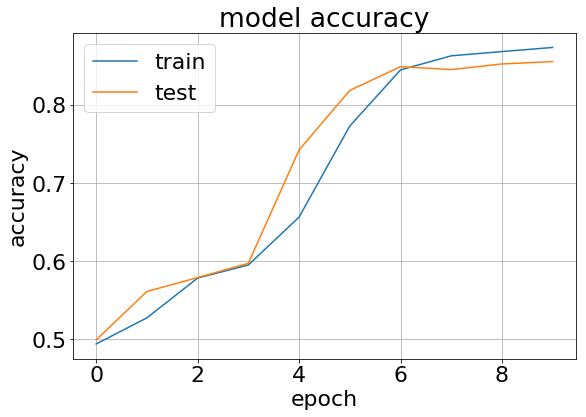

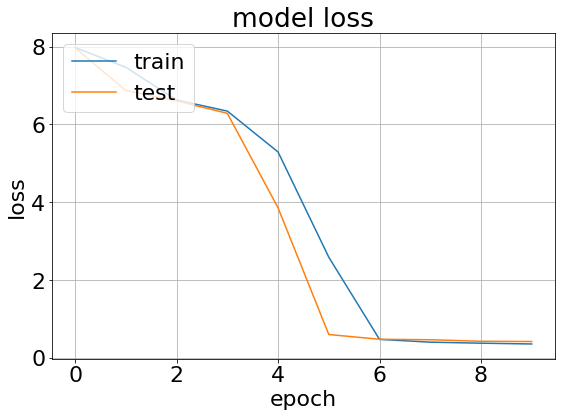

In [7]:
drow_acc(hist)
drow_loss(hist)

3.
Для разных объемов выборки построить графики кривой обучения, показывающие различные скорости обучения.

In [8]:
hist_list = []

for part in np.linspace(0.33, 1, num = 3) :
    print('part %s' % part)
    
    element_cnt = int(x_train.shape[0] * part)
    
    x_part_train = x_train[ :element_cnt ,:,:]
    y_part_train = y_train[ :element_cnt]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    hist = model.fit(x_part_train, y_part_train, epochs = 10, validation_data=(x_test,y_test))
    hist_list.append(hist.history)

part 0.33
Train on 19800 samples, validate on 10000 samples
Epoch 1/10
19800/19800 [==============================] - 7s 337us/step - loss: 10.1270 - acc: 0.3687 - val_loss: 10.2306 - val_acc: 0.3642
Epoch 2/10
19800/19800 [==============================] - 6s 327us/step - loss: 10.0468 - acc: 0.3753 - val_loss: 10.0385 - val_acc: 0.3766
Epoch 3/10
19800/19800 [==============================] - 6s 315us/step - loss: 10.0156 - acc: 0.3779 - val_loss: 10.1397 - val_acc: 0.3701
Epoch 4/10
19800/19800 [==============================] - 7s 337us/step - loss: 10.0572 - acc: 0.3754 - val_loss: 10.1212 - val_acc: 0.3712
Epoch 5/10
19800/19800 [==============================] - 6s 310us/step - loss: 9.9894 - acc: 0.3797 - val_loss: 10.0415 - val_acc: 0.3767
Epoch 6/10
19800/19800 [==============================] - 6s 324us/step - loss: 10.0325 - acc: 0.3769 - val_loss: 10.3783 - val_acc: 0.3557
Epoch 7/10
19800/19800 [==============================] - 6s 313us/step - loss: 10.0174 - acc: 0.3781

In [9]:
hist_list[0].keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

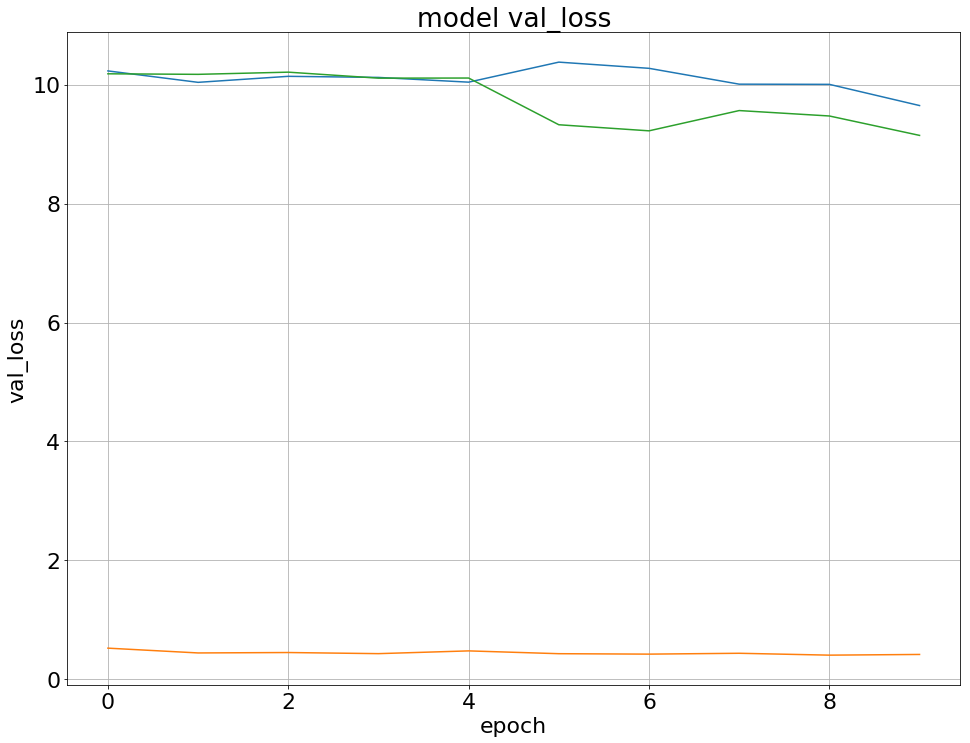

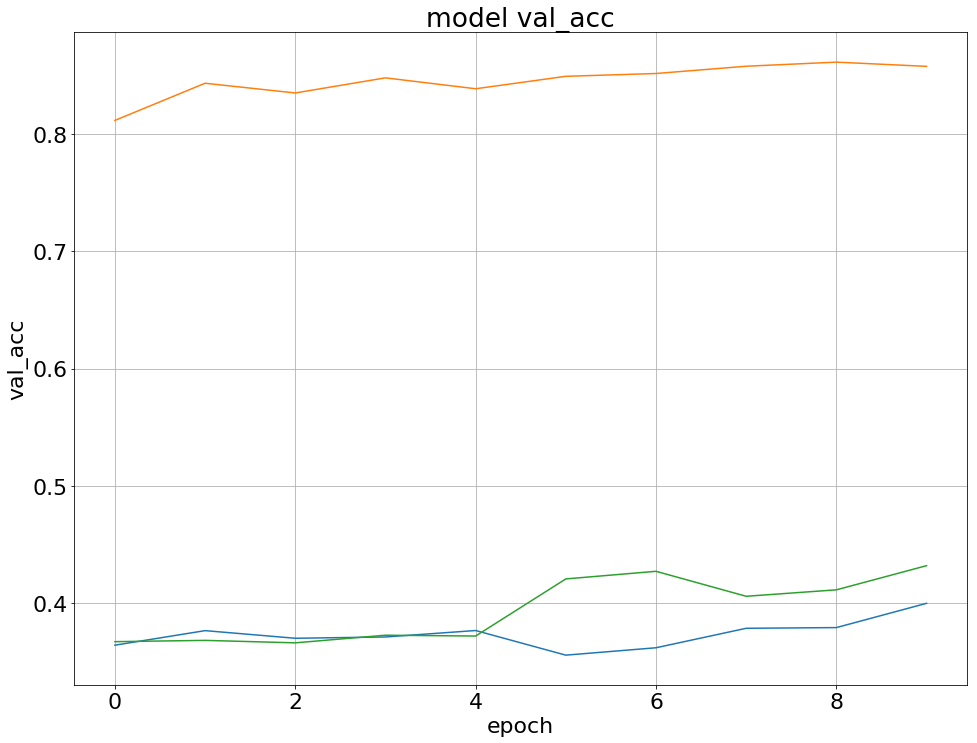

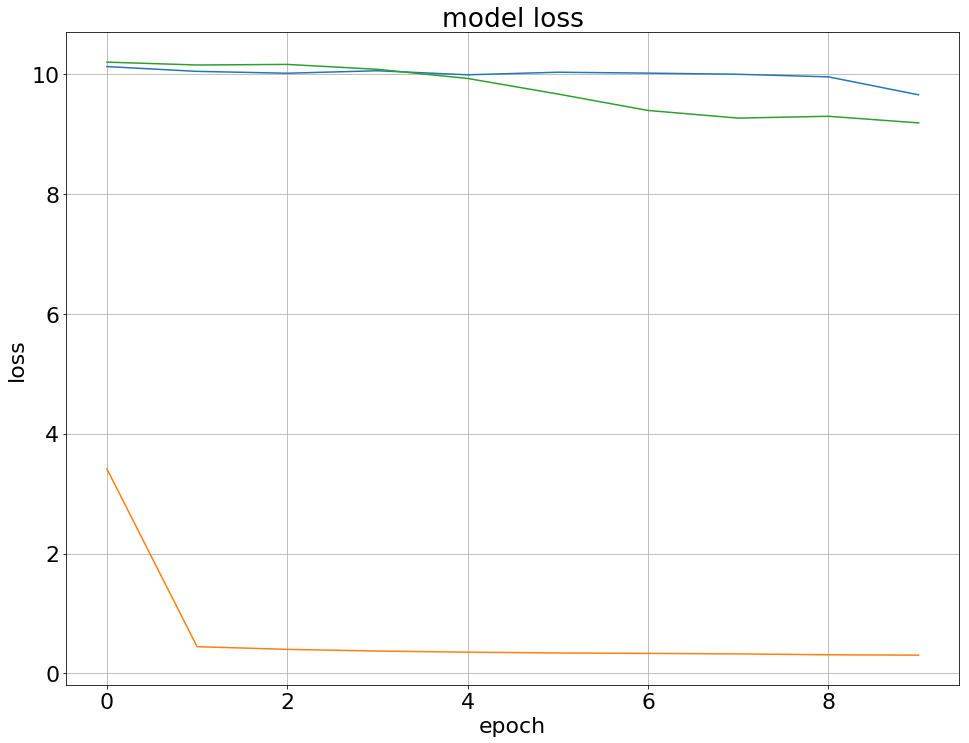

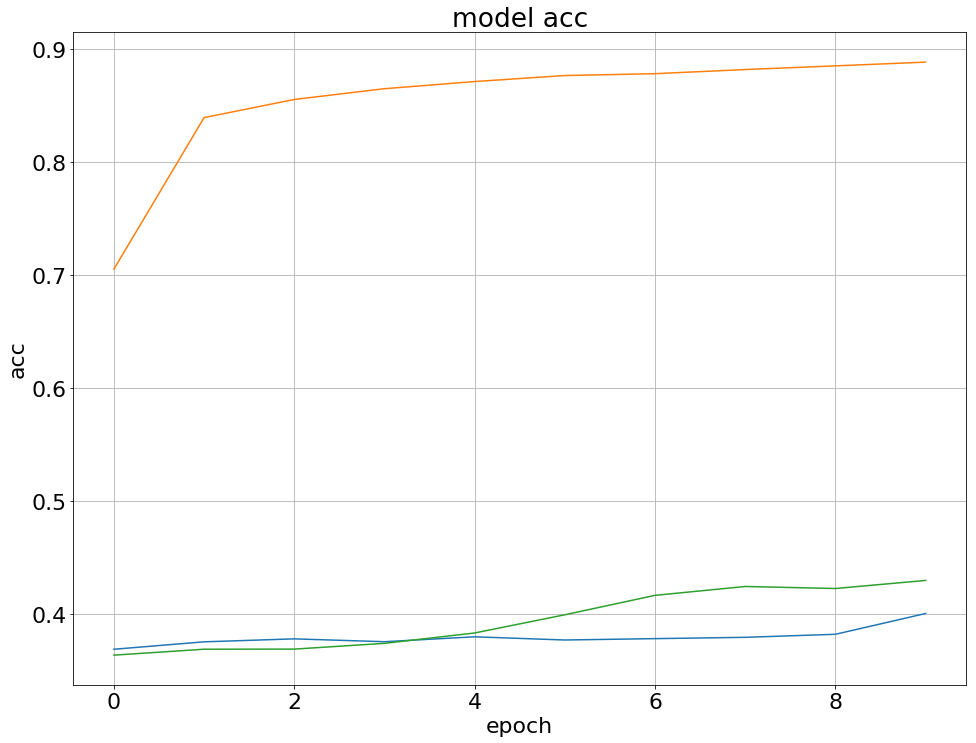

In [10]:
for key in hist_list[0].keys() :
    plt.figure(figsize = (16, 12))
    plt.grid(True)

    
    plt.title('model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')

    for hist in hist_list :
        plt.plot(hist[key])

    #file_neme = 'plots/' + key + '.png'
    #plt.savefig(fname=file_neme,format='png')
    plt.show()


4.
Наложить на выборку шум.
Например, перемешать независимые переменные или добавить случайный шум в зависимые, на ваш выбор. Построить несколько графиков кривой обучения в условиях наложенного шума с разной дисперсией.
Зашумлённые данне должны оставаться картинкой. (лежать в диапазоне от 0 до 1)

Пускай шум имеет нормально распределение. Тогда : $$mean = 0.5$$ $$ 3 \sigma \lt 0.5 $$

In [11]:
hist_list = []

for noise_koef in np.linspace(0, 1, num = 5) :
    
    noise = np.random.normal(loc = 0.5, scale = 0.16, size = x_train.shape)
    x_part_noise = x_train + noise_koef * noise
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    ])
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    hist = model.fit(x_part_noise, y_train, epochs = 10, validation_data = (x_test,y_test))
    hist_list.append(hist.history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 305us/step - loss: 10.1849 - acc: 0.3616 - val_loss: 9.9119 - val_acc: 0.3814
Epoch 2/10
60000/60000 [==============================] - 18s 295us/step - loss: 8.5549 - acc: 0.4647 - val_loss: 7.7085 - val_acc: 0.5173
Epoch 3/10
60000/60000 [==============================] - 18s 297us/step - loss: 7.5360 - acc: 0.5275 - val_loss: 7.1768 - val_acc: 0.5508
Epoch 4/10
60000/60000 [==============================] - 18s 296us/step - loss: 7.2697 - acc: 0.5454 - val_loss: 7.1540 - val_acc: 0.5530
Epoch 5/10
60000/60000 [==============================] - 18s 299us/step - loss: 6.9348 - acc: 0.5639 - val_loss: 6.9329 - val_acc: 0.5637
Epoch 6/10
60000/60000 [==============================] - 18s 299us/step - loss: 6.6123 - acc: 0.5843 - val_loss: 6.6064 - val_acc: 0.5847
Epoch 7/10
60000/60000 [==============================] - 18s 297us/step - loss: 6.5737 - acc: 0.5872 - val_loss: 6

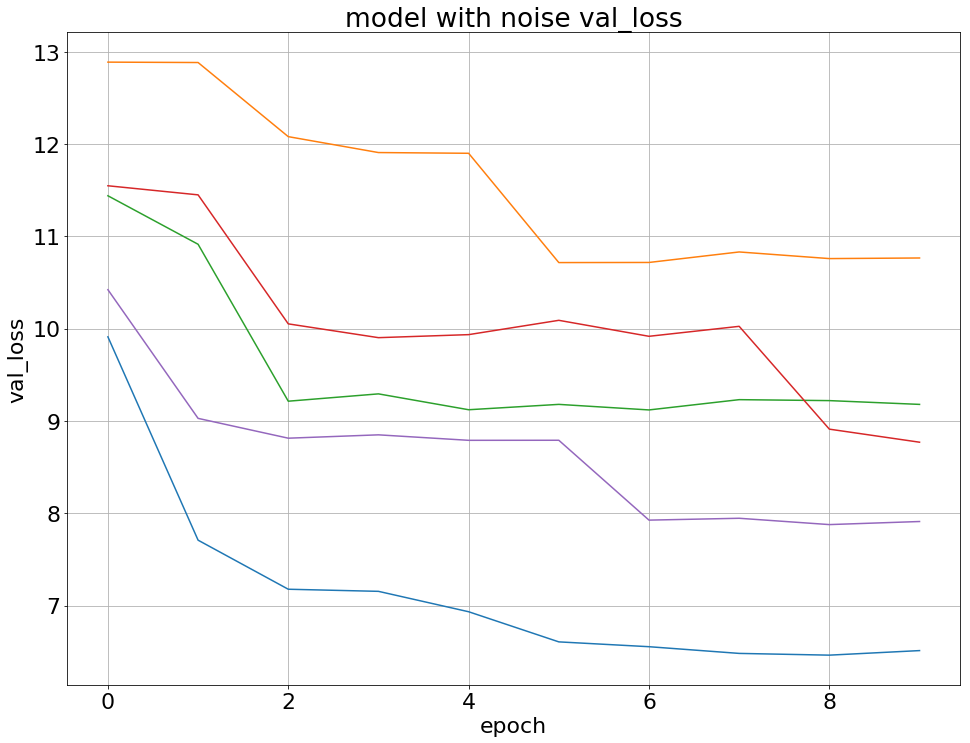

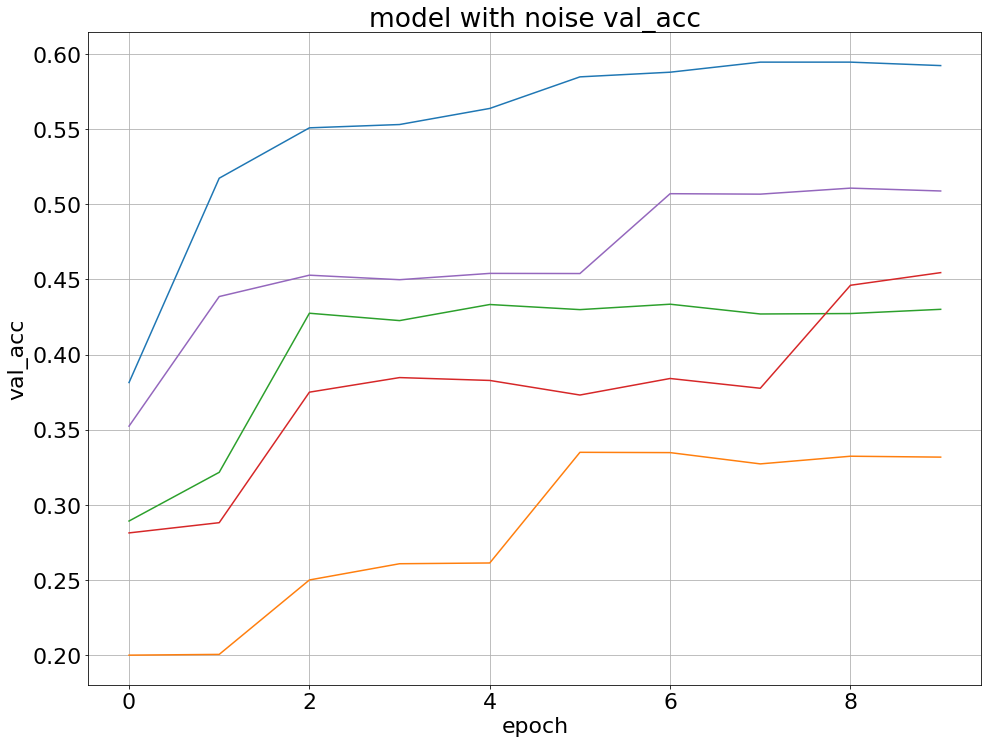

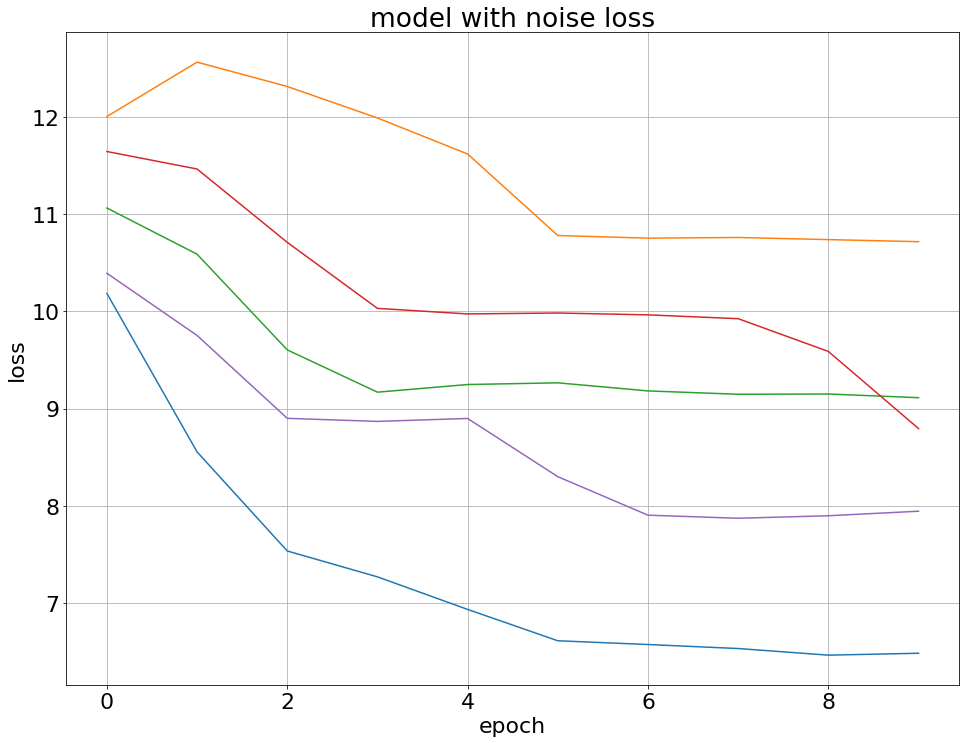

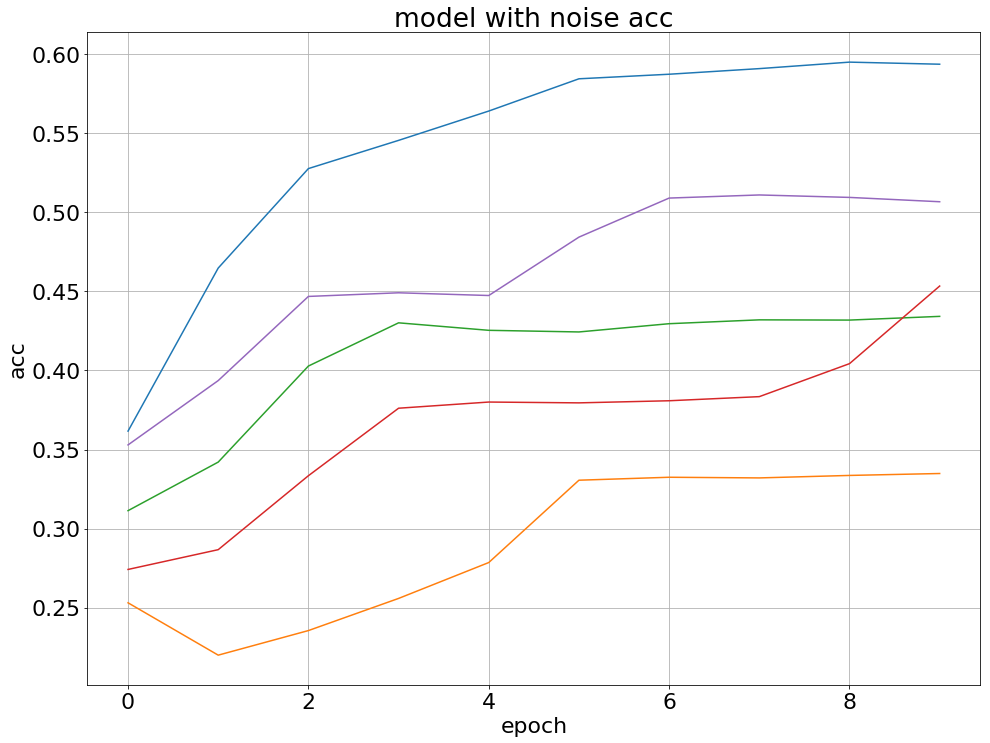

In [12]:
for key in hist_list[0].keys() :
    plt.figure(figsize = (16,12))
    plt.grid(True)

    
    plt.title('model with noise ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')

    for hist in hist_list :
        plt.plot(hist[key])

    #file_neme = 'plots/' + key + ' noise.png'
    #plt.savefig(fname=file_neme,format='png')
    plt.show()